# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three contingency tables using only people whose age is between 30 and 40.

In [2]:
# insert your code here
da['DMDMARTL'] = da['DMDMARTL'].replace({1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated',
                                         5: 'Never married', 6: 'Living w partner', 77: 'Refused', 99: 'Dont Know'})


freq_table = da['DMDMARTL'].value_counts()
print('--Frequency table for all ppl--\n', freq_table)


freq_table_men = da['DMDMARTL'].where(da['RIAGENDR'] == 1).value_counts()
freq_table_women = da['DMDMARTL'].where(da['RIAGENDR'] == 2).value_counts()
print('\n\n--Frequency table for men only--\n', freq_table_men)
print('--Frequency table for women only--\n', freq_table_women)


freq_table_3040 = da['DMDMARTL'].where((da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)).value_counts()
freq_table_men_3040 = da['DMDMARTL'].where((da['RIAGENDR'] == 1) & (da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)).value_counts()
freq_table_women_3040 = da['DMDMARTL'].where((da['RIAGENDR'] == 2) & (da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)).value_counts()
print('\n\n--Frequency table for all ppl between 30-40y--\n', freq_table_3040)
print('--Frequency table for men only between 30-40y--\n', freq_table_men_3040)
print('--Frequency table for women only between 30-40y--\n', freq_table_women_3040)

--Frequency table for all ppl--
 Married             2780
Never married       1004
Divorced             579
Living w partner     527
Widowed              396
Separated            186
Refused                2
Name: DMDMARTL, dtype: int64


--Frequency table for men only--
 Married             1477
Never married        484
Living w partner     265
Divorced             229
Widowed              100
Separated             68
Refused                1
Name: DMDMARTL, dtype: int64
--Frequency table for women only--
 Married             1303
Never married        520
Divorced             350
Widowed              296
Living w partner     262
Separated            118
Refused                1
Name: DMDMARTL, dtype: int64


--Frequency table for all ppl between 30-40y--
 Married             560
Never married       217
Living w partner    143
Divorced             70
Separated            30
Widowed               5
Refused               1
Name: DMDMARTL, dtype: int64
--Frequency table for men only betwe

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

<!-- --Frequency table for men only--
Married             0.562881 >
Never married       0.184451 =
Living w partner    0.100991 =
Divorced            0.087271 <
Widowed             0.038110 >
Separated           0.025915 <
Refused             0.000381 =
--Frequency table for women only--
Married             0.457193
Never married       0.182456
Divorced            0.122807
Widowed             0.103860
Living w partner    0.091930
Separated           0.041404
Refused             0.000351 -->
More % of men with marital statuses:  
&emsp;Married  
More % of women with marital statuses:  
&emsp;Divorced  
&emsp;Widowed  
&emsp;Separated  
Approximately equal:  
&emsp;Refused  
&emsp;Never married   
&emsp;Living with partner

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

<!-- --Frequency table for women only--
 Married             0.457193 <
Never married       0.182456 <
Divorced            0.122807 >
Widowed             0.103860 >
Living w partner    0.091930 < 
Separated           0.041404 >
Refused             0.000351
--Frequency table for women only between 30-40y--
 Married             0.535714
Never married       0.218045
Living w partner    0.122180
Divorced            0.086466
Separated           0.033835
Widowed             0.003759 -->
More % of women between the overall population with marital statuses:  
&emsp;Widowed  
&emsp;Divorced  
&emsp;Separated  
More % of women between the ages 30-40 with marital statuses:  
&emsp;Married  
&emsp;Never married  
&emsp;Living w partner  


There`s no women with marital status Refused between 30-40y

__Q1c.__ Repeat part b for the men.

<!-- --Frequency table for men only--
Married             0.562881 =
Never married       0.184451 <
Living w partner    0.100991 <
Divorced            0.087271 >
Widowed             0.038110 >
Separated           0.025915 =
Refused             0.000381
--Frequency table for men only between 30-40y--
Married             0.556680
Never married       0.204453
Living w partner    0.157895
Divorced            0.048583
Separated           0.024291
Widowed             0.006073
Refused             0.002024 -->
More % of men between the overall population with marital statuses:  
&emsp;Divorced  
&emsp;Widowed  
More % of men between the ages 30-40 with marital statuses:  
&emsp;Never married  
&emsp;Living w partner  
Approximately equal:  
&emsp;Married  
&emsp;Separated  

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [3]:
# insert your code here
da['agegrp'] = pd.cut(da['RIDAGEYR'], np.arange(10, 81, 10))
bands_women = da.groupby(pd.cut(da['RIDAGEYR'].where(da['RIAGENDR'] == 2), np.arange(10, 81, 10)))['DMDMARTL'].value_counts().unstack()
bands_women = bands_women.apply(lambda x: x/x.sum(), axis=1)
bands_women

DMDMARTL,Divorced,Living w partner,Married,Never married,Refused,Separated,Widowed
RIDAGEYR,,,,,,,
"(10, 20]",NaN,0.205128,0.025641,0.769231,NaN,NaN,NaN
"(20, 30]",0.021401,0.206226,0.305447,0.445525,NaN,0.021401,NaN
"(30, 40]",0.090717,0.120253,0.544304,0.204641,NaN,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,0.125498,NaN,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,0.089362,0.002128,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,0.086168,NaN,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,0.051220,NaN,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

The older the more likely women has marital status Divorced, Widowed  
The younger the more likely women has marital status Living w partner, Never married  
Marital statuses Married and Separated have the peak at the age of 40-50 and then start to decline 

__Q2b.__ Repeat the construction for males.

In [4]:
# insert your code here
da['agegrp'] = pd.cut(da['RIDAGEYR'], np.arange(10, 81, 10))
bands_men = da.groupby(pd.cut(da['RIDAGEYR'].where(da['RIAGENDR'] == 1), np.arange(10, 81, 10)))['DMDMARTL'].value_counts().unstack()
bands_men = bands_men.apply(lambda x: x/x.sum(), axis=1)
bands_men

DMDMARTL,Divorced,Living w partner,Married,Never married,Refused,Separated,Widowed
RIDAGEYR,,,,,,,
"(10, 20]",NaN,0.075000,0.025000,0.900000,NaN,NaN,NaN
"(20, 30]",0.004630,0.212963,0.238426,0.523148,NaN,0.016204,0.004630
"(30, 40]",0.052402,0.157205,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,0.022388,NaN,0.034826,0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

Men's status Divorced doesnt decline at the age 70-80 unlike women's  
Men's status Separated continuous to increase after age of 50 unlike women`s

## Question 3

Construct a histogram of the distribution of heights in the NHANES sample.

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

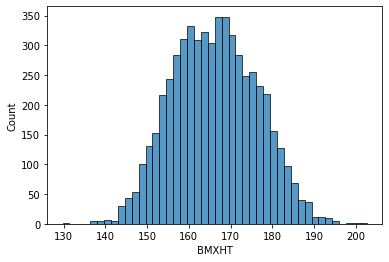

In [5]:
# insert your code here
h_plt = da['BMXHT'].dropna()
sns.histplot(h_plt)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

 Default value of bins gives a meaningful result  
 If number of bins grows excessively large(1000) - result becomes more precise but its harder to analyze  
 If number of bins grows excessively small(2) - result becomes almost useless to analyze

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

<AxesSubplot:>

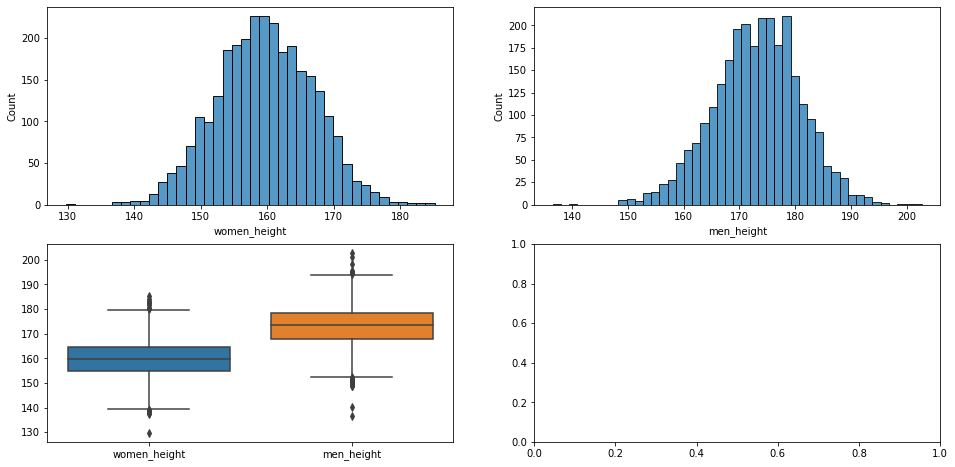

In [2]:
# insert your code here
height_df = pd.DataFrame()
height_df['women_height'] = da['BMXHT'].where(da['RIAGENDR'] == 2)
height_df['men_height'] = da['BMXHT'].where(da['RIAGENDR'] == 1)

f, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.histplot(height_df['women_height'], ax=axes[0,0])
sns.histplot(height_df['men_height'], ax=axes[0,1])

sns.boxplot(data=height_df, ax=axes[1,0])

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

Features are not represented clearly in the boxplots:  
&emsp;Shape of distribution  


Features that easier to see in the boxplots than in the histograms:  
&emsp;Median  
&emsp;QR1, QR3, IQR, min, max  
&emsp;Easier to identify outliers  

__Q3d.__ Make a histogram of the log-transformed heights.

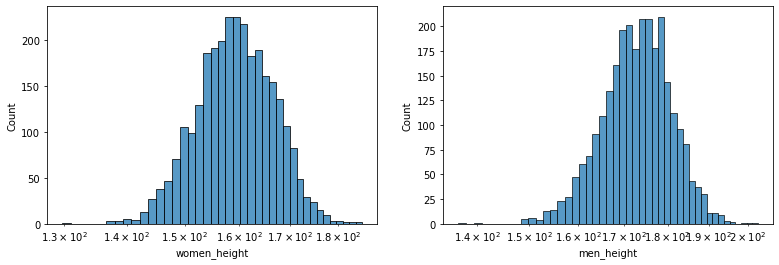

In [3]:
# insert your code here
f, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.histplot(height_df['women_height'], ax=axes[0]).set_xscale('log')
sns.histplot(height_df['men_height'], ax=axes[1]).set_xscale('log')

__Q3e.__ Comment on the relationship between the ditribution of the heights and the distribution of the log-transformed heights. 

Log-transformed distribution is used to transform skewed data to approximately conform to normality

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY2'>

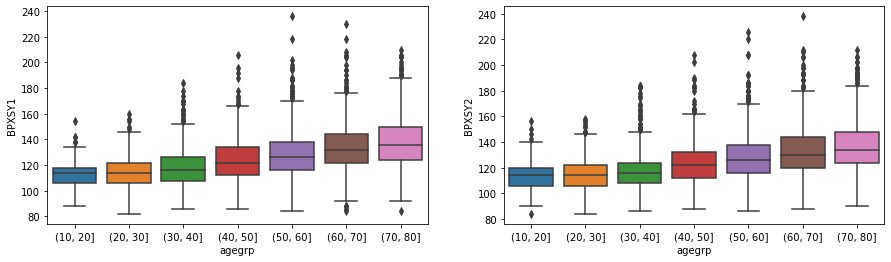

In [8]:
# insert your code here
#bp_plot = sns.boxplot(data=da_box)
f, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(x=da['agegrp'], y=da['BPXSY1'], ax=axes[0])
sns.boxplot(x=da['agegrp'], y=da['BPXSY2'], ax=axes[1])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [80]:
# insert your code here
bp = da['BPXSY2'].where(da['BPXSY2'] < da['BPXSY1'])
bp2_less = bp.count()
bp1_count = da['BPXSY1'].count()
proportion = bp2_less / bp1_count
print(proportion)

0.4560266617293094


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

<AxesSubplot:>

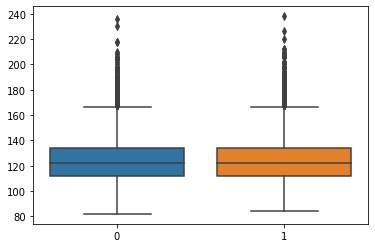

In [9]:
# insert your code here
sns.boxplot(data=[da['BPXSY1'], da['BPXSY2']])

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

SBP1:  
The older the higher SBP  
Older ppl have bigger spread of SBP  
Young ppl have less outliers  

There`s no noticable difference between SBP1 and SBP2

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [4]:
# insert your code here
# DMDHHSIZ -> household size
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

household_freq = da["DMDEDUC2x"].groupby(da['DMDHHSIZ']).value_counts().unstack()
household_freq = household_freq.apply(lambda x: x/x.sum(), axis=1)
household_freq

DMDEDUC2x,9-11,<9,College,Don't know,HS/GED,Some college/AA
DMDHHSIZ,,,,,,
1,0.097656,0.093750,0.253906,NaN,0.235677,0.319010
2,0.093832,0.096457,0.311680,0.001312,0.210630,0.286089
3,0.106925,0.097760,0.269857,NaN,0.206721,0.318737
4,0.111745,0.099202,0.257697,NaN,0.218928,0.312429
5,0.144615,0.149231,0.200000,0.001538,0.200000,0.304615
6,0.212209,0.206395,0.116279,NaN,0.226744,0.238372
7,0.167173,0.258359,0.106383,NaN,0.246201,0.221884


__Q5a.__ Comment on any major differences among the distributions.

No major differences

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [90]:
# insert your code here
med = da["DMDHHSIZ"].where((da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)).groupby([da['DMDEDUC2x'], da["RIAGENDR"]]).median()
med.dropna()

DMDEDUC2x        RIAGENDR
9-11             1           4.5
                 2           5.0
<9               1           5.0
                 2           5.0
College          1           3.0
                 2           3.0
HS/GED           1           4.0
                 2           5.0
Some college/AA  1           4.0
                 2           4.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [68]:
# insert your code here
mvu = pd.DataFrame()
mvu = mvu.assign(SDMVPSU=da['SDMVPSU'], SDMVSTRA=da['SDMVSTRA'], age=da['RIDAGEYR'], height=da['BMXHT'], BMI=da['BMXBMI'], gender = da['RIAGENDR'])
mvu =  mvu.groupby(['gender', 'SDMVPSU', 'SDMVSTRA'])

mvu_mean = mvu.mean()
print(f'Ratios:\n{mvu_mean.max() - mvu_mean.min()}')
mvu_mean

Ratios:
age       13.575304
height    21.572116
BMI        7.239683
dtype: float64


age      height        BMI
gender SDMVPSU SDMVSTRA                                  
1      1       119       47.861111  172.741667  26.958333
               120       43.130000  169.537755  30.939175
               121       46.750000  172.177885  29.416505
               122       44.653061  173.998969  28.528866
               123       47.829787  174.315217  29.231522
               124       50.750000  172.109009  28.614414
               125       55.165289  173.631092  29.727731
               126       48.416667  175.149398  29.033333
               127       53.137931  171.545349  31.062353
               128       53.673267  169.325000  31.749000
               129       43.922222  171.094318  26.493182
               130       50.516854  176.974157  30.337079
               131       53.140187  175.610476  28.259615
               132       42.380435  172.534066  28.546154
               133       44.054795  171.509722  27.495833
       2       119       54.363636  172.906818  27.160465
               120       45.219178  173.075342  27.727397
               121       42.063158  174.764516  26.273118
               122       44.320000  170.332323  25.744444
               123       52.126582  174.454430  28.811392
               124       48.245614  174.291228  27.714035
               125       49.705882  174.456863  29.143564
               126       48.666667  174.713043  29.039130
               127       54.070588  173.366667  30.557831
               128       45.822785  172.400000  26.835443
               129       45.775510  173.138298  28.961702
               130       50.535354  175.061224  29.237755
               131       46.778846  175.091346  30.077885
               132       49.038760  172.809524  28.966667
               133       47.489796  171.179167  27.966667
2      1       119       47.663265  159.570408  30.052041
               120       43.636364  155.402041  32.419388
               121       44.397959  158.871579  30.856842
               122       42.897436  161.315385  29.447436
               123       44.841121  162.059615  29.905769
               124       51.664000  158.788710  29.533065
               125       50.900901  160.762385  30.385321
               126       46.229167  160.387500  31.262500
               127       49.694444  157.422430  32.189720
               128       55.638462  156.339062  32.303125
               129       45.329787  156.900000  29.019149
               130       47.810526  161.977895  30.700000
               131       54.893617  161.989362  30.061702
               132       43.210526  161.508421  29.848421
               133       45.105882  158.295122  27.959259
       2       119       52.987952  159.244578  27.849398
               120       43.736111  159.218056  27.400000
               121       44.376344  160.229032  26.470968
               122       47.333333  157.231111  26.611111
               123       46.457447  160.476596  30.641489
               124       42.541667  162.853521  28.640845
               125       51.660000  160.021429  28.564286
               126       47.205882  160.892000  29.612121
               127       51.486239  159.022936  30.770642
               128       45.589744  160.437179  27.491026
               129       43.500000  161.034259  29.429630
               130       50.833333  160.060577  31.490385
               131       45.000000  161.673810  32.984127
               132       51.700000  159.138281  30.540625
               133       47.063158  158.627368  29.000000

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

Age: from 42 to 55  
Height: from 155 to 177  
BMI: from 25 to 33

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [73]:
mvu_iqr = mvu.quantile()
print(f'Ratios:\n{mvu_iqr.max() - mvu_iqr.min()}')
mvu_iqr

Ratios:
age       22.00
height    21.95
BMI        7.40
dtype: float64


age  height    BMI
gender SDMVPSU SDMVSTRA                     
1      1       119       51.5  173.05  25.60
               120       38.0  169.50  29.30
               121       48.5  172.10  29.20
               122       43.0  174.60  28.00
               123       49.5  174.30  28.40
               124       56.0  172.20  27.90
               125       60.0  174.20  29.20
               126       49.5  175.60  28.20
               127       54.0  171.55  30.00
               128       59.0  169.25  30.55
               129       43.0  170.65  26.80
               130       50.0  177.20  29.10
               131       54.0  175.60  26.95
               132       40.0  172.80  27.40
               133       43.0  171.75  26.40
       2       119       60.0  172.85  26.30
               120       45.0  171.90  26.90
               121       41.0  175.70  26.10
               122       44.0  170.60  25.20
               123       53.0  174.20  28.20
               124       45.0  174.40  26.60
               125       51.0  174.10  27.70
               126       47.0  175.50  27.90
               127       57.0  172.95  29.50
               128       46.0  172.90  26.70
               129       43.5  173.45  27.85
               130       53.0  175.70  27.45
               131       45.5  174.90  28.15
               132       48.0  172.65  27.90
               133       49.5  170.65  26.65
2      1       119       48.0  160.80  29.30
               120       40.0  155.25  30.85
               121       41.5  157.30  29.10
               122       41.0  160.95  27.75
               123       45.0  161.95  29.50
               124       54.0  158.55  28.60
               125       54.0  161.40  29.50
               126       42.5  160.95  29.85
               127       50.0  157.80  31.90
               128       60.0  155.75  31.15
               129       44.0  156.60  27.90
               130       45.0  161.80  28.60
               131       55.0  162.35  28.80
               132       38.0  162.50  28.90
               133       45.0  158.20  27.60
       2       119       59.0  159.10  27.50
               120       43.5  159.20  26.40
               121       41.0  159.10  24.50
               122       47.5  156.95  25.35
               123       45.5  160.80  29.05
               124       40.0  163.30  25.50
               125       54.0  159.75  27.00
               126       46.0  160.45  28.80
               127       54.0  158.90  29.90
               128       46.0  159.50  25.85
               129       41.0  161.00  29.10
               130       51.5  159.85  30.20
               131       45.0  161.55  31.50
               132       51.5  158.95  28.90
               133       46.0  157.90  27.50

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.

Age: from 38 to 60  
Height: from 155.25 to 177.2  
BMI: from 24.5 to 31.9